# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ –∫ –º–æ–¥—É–ª—é –ø–æ Computer Vision

## Task 1:

–£ –≤–∞—Å –µ—Å—Ç—å –Ω–æ—É—Ç–±—É–∫ circle_generator.ipynb –í–∞—à–∞ –∑–∞–¥–∞—á–∞ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫—Ä—É–∂–æ—á–∫–æ–≤ –∏ –Ω–∞—Ç—Ä–µ–Ω–∏—Ä–æ–≤–∞—Ç—å –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å —Å –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–æ–π UNet –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∫—Ä—É–∂–æ—á–∫–æ–≤ –Ω–∞ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö.
- –ù–µ –∑–∞–±—ã–≤–∞–µ–º –ø—Ä–æ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ train/test/validation
- –°—á–∏—Ç–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –ª–æ—Å—Å–∞ –∏ –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ –∏ —Ç–µ—Å—Ç–µ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è
- –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –ª–æ—Å—Å–∞ –Ω–∞ —Ç—Ä–µ–π–Ω–µ –∏ —Ç–µ—Å—Ç–µ –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è
- –û—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –Ω–∞ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –º–µ—Ç—Ä–∏–∫–µ.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–æ–¥—Ä–æ–±–Ω–µ–µ, –∫–∞–∫–∏–µ –∫–ª–∞—Å—Å—ã –∏ –º–µ—Ç–æ–¥—ã –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏ –¥–æ–ø–∏—à–µ–º doc strings –¥–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è.

In [2]:
class BaseDataProvider(object):
    """
    Base class for providing image data and corresponding labels for training segmentation models.

    This class is designed to be subclassed. Subclasses must implement the `_next_data` method
    that returns raw image data and the corresponding labels. The class handles normalization,
    label processing, and reshaping to fit the input requirements of a segmentation network.

    Attributes:
        channels (int): Number of input data channels (default is 1 for grayscale).
        n_class (int): Number of label classes (default is 2 for binary segmentation).
        a_min (float): Minimum value for clipping during normalization (default is -inf).
        a_max (float): Maximum value for clipping during normalization (default is +inf).

    Methods:
        __call__(n): Returns n samples of processed data and labels.
        _load_data_and_label(): Loads a single pair of processed data and labels.
        _process_data(data): Normalizes the input image data.
        _process_labels(label): Converts label into one-hot encoded format.
        _post_process(data, labels): Optional hook for post-processing (e.g., data augmentation).
    """
    channels = 1
    n_class = 2

    def __init__(self, a_min=None, a_max=None):
        """
        Initializes the data provider with optional normalization limits.
    
        Args:
            a_min (float, optional): Minimum value for clipping during normalization. Defaults to -inf.
            a_max (float, optional): Maximum value for clipping during normalization. Defaults to +inf.
        """
        self.a_min = a_min if a_min is not None else -np.inf
        self.a_max = a_max if a_min is not None else np.inf

    def _load_data_and_label(self):
        """
        Loads and processes a single data-label pair.
    
        Returns:
            tuple: A tuple (train_data, labels) where:
                - train_data (np.ndarray): Normalized input data of shape (1, H, W, channels).
                - labels (np.ndarray): One-hot encoded labels of shape (1, H, W, n_class).
        """
        data, label = self._next_data()

        train_data = self._process_data(data)
        labels = self._process_labels(label)

        train_data, labels = self._post_process(train_data, labels)

        nx = train_data.shape[1]
        ny = train_data.shape[0]

        return train_data.reshape(1, ny, nx, self.channels), labels.reshape(1, ny, nx, self.n_class),

    def _process_labels(self, label):
        """
        Converts binary labels into one-hot encoded format.
    
        If n_class == 2, assumes the input is a binary mask and creates a two-channel label
        where channel 0 is the background and channel 1 is the foreground.
    
        Args:
            label (np.ndarray): A 2D array of label data (should be boolean or convertible 
            to boolean).
    
        Returns:
            np.ndarray: One-hot encoded label array of shape (H, W, n_class).
        """
        if self.n_class == 2:
            nx = label.shape[1]
            ny = label.shape[0]
            labels = np.zeros((ny, nx, self.n_class), dtype=np.float32)

            # It is the responsibility of the child class to make sure that the label
            # is a boolean array, but we a chech here just in case.
            if label.dtype != 'bool':
                label = label.astype(bool)

            labels[..., 1] = label
            labels[..., 0] = ~label
            return labels

        return label

    def _process_data(self, data):
        """
        Normalizes the input data array by clipping, taking absolute values,
        and scaling to the range [0, 1].
    
        Args:
            data (np.ndarray): Input image data.
    
        Returns:
            np.ndarray: Normalized image data.
        """
        # normalization
        data = np.clip(np.fabs(data), self.a_min, self.a_max)
        data -= np.amin(data)

        if np.amax(data) != 0:
            data /= np.amax(data)

        return data

    def _post_process(self, data, labels):
        """
        Hook for additional processing or data augmentation. 
        Meant to be overridden by subclasses.
    
        Args:
            data (np.ndarray): Normalized data array.
            labels (np.ndarray): One-hot encoded label array.
    
        Returns:
            tuple: The possibly modified (data, labels) tuple.
        """
        return data, labels

    def __call__(self, n):
        """
        Generates a batch of n processed samples.
    
        Args:
            n (int): Number of samples to generate.
    
        Returns:
            tuple: A tuple (X, Y) where:
                - X (np.ndarray): Batch of input images of shape (n, H, W, channels).
                - Y (np.ndarray): Batch of label masks of shape (n, H, W, n_class).
        """
        train_data, labels = self._load_data_and_label()
        nx = train_data.shape[1]
        ny = train_data.shape[2]

        X = np.zeros((n, nx, ny, self.channels))
        Y = np.zeros((n, nx, ny, self.n_class))

        X[0] = train_data
        Y[0] = labels
        for i in range(1, n):
            train_data, labels = self._load_data_and_label()
            X[i] = train_data
            Y[i] = labels

        return X, Y

In [3]:
class GrayScaleDataProvider(BaseDataProvider):
    """
    Data provider for synthetic grayscale images with circle (and optional rectangle) masks.

    Inherits from BaseDataProvider and implements the _next_data method to generate
    images with corresponding segmentation labels. The image and label generation
    is controlled by the create_image_and_label function.

    Attributes:
        channels (int): Number of channels in the input image (1 for grayscale).
        n_class (int): Number of output classes (2 for circles only, 3 if rectangles included).
        nx (int): Width of the image.
        ny (int): Height of the image.
        kwargs (dict): Additional keyword arguments passed to the image generator.

    Args:
        nx (int): Width of the image.
        ny (int): Height of the image.
        **kwargs: Additional parameters passed to `create_image_and_label`.
                  If 'rectangles' is True, uses 3 output classes instead of 2.
    """
    # 1 for grayscale
    channels = 1
    # 2 for circles only
    n_class = 2

    def __init__(self, nx, ny, **kwargs):
        super(GrayScaleDataProvider, self).__init__()
        self.nx = nx
        self.ny = ny
        self.kwargs = kwargs
        rect = kwargs.get("rectangles", False)
        if rect:
            self.n_class=3

    def _next_data(self):
        """
        Generates the next synthetic image and corresponding label mask.
    
        Returns:
            tuple:
                - data (np.ndarray): A 2D grayscale image of shape (ny, nx).
                - label (np.ndarray): A 2D label mask with values representing different classes.
        """
        return create_image_and_label(self.nx, self.ny, **self.kwargs)

In [4]:
class RgbDataProvider(BaseDataProvider):
    """
    Data provider for synthetic RGB images with circle (and optional rectangle) masks.

    Extends BaseDataProvider and overrides _next_data to return 3-channel (RGB) images.
    Uses create_image_and_label to generate synthetic grayscale data, which is then converted
    to RGB using the to_rgb function.

    Attributes:
        channels (int): Number of channels in the input image (3 for RGB).
        n_class (int): Number of output classes (2 for circles only, 3 if rectangles included).
        nx (int): Width of the image.
        ny (int): Height of the image.
        kwargs (dict): Additional keyword arguments passed to the image generator.

    Args:
        nx (int): Width of the image.
        ny (int): Height of the image.
        **kwargs: Additional parameters passed to create_image_and_label.
                  If 'rectangles' is True, sets n_class = 3.
    """
    channels = 3
    n_class = 2

    def __init__(self, nx, ny, **kwargs):
        super(RgbDataProvider, self).__init__()
        self.nx = nx
        self.ny = ny
        self.kwargs = kwargs
        rect = kwargs.get("rectangles", False)
        if rect:
            self.n_class=3


    def _next_data(self):
        """
        Generates the next synthetic RGB image and corresponding label mask.
    
        Returns:
            tuple:
                - data (np.ndarray): A 3-channel RGB image of shape (ny, nx, 3).
                - label (np.ndarray): A 2D label mask with class values.
        """
        data, label = create_image_and_label(self.nx, self.ny, **self.kwargs)
        return to_rgb(data), label

In [5]:
def create_image_and_label(nx,ny, cnt = 10, r_min = 5, r_max = 50, border = 92, sigma = 20, rectangles=False):
    """
    Generates a synthetic grayscale image with circular and optionally rectangular objects,
    along with corresponding segmentation masks.

    The function creates an image of size (nx, ny) with cnt random circles (and optional
    rectangles), adds Gaussian noise, and returns the image along with its label mask(s).

    Args:
        nx (int): Width of the image.
        ny (int): Height of the image.
        cnt (int): Number of shapes (circles and/or rectangles) to generate. Default is 10.
        r_min (int): Minimum radius/size of shapes. Default is 5.
        r_max (int): Maximum radius/size of shapes. Default is 50.
        border (int): Minimum distance from the border to place shapes. Default is 92.
        sigma (float): Standard deviation of Gaussian noise added to the image. Default is 20.
        rectangles (bool): Whether to include rectangles in addition to circles. Default is False.

    Returns:
        tuple:
            - image (np.ndarray): A 2D grayscale image of shape (nx, ny, 1) with values in [0, 1].
            - label (np.ndarray):
                - If rectangles is False: a binary mask of shape (nx, ny) for circles only.
                - If rectangles is True: a one-hot encoded mask of shape (nx, ny, 3), where:
                    - channel 0: background
                    - channel 1: circles
                    - channel 2: rectangles
    """

    image = np.ones((nx, ny, 1))
    label = np.zeros((nx, ny, 3), dtype=bool)
    mask = np.zeros((nx, ny), dtype=bool)
    for _ in range(cnt):
        a = np.random.randint(border, nx-border)
        b = np.random.randint(border, ny-border)
        r = np.random.randint(r_min, r_max)
        h = np.random.randint(1,255)

        y,x = np.ogrid[-a:nx-a, -b:ny-b]
        m = x*x + y*y <= r*r
        mask = np.logical_or(mask, m)

        image[m] = h

    label[mask, 1] = 1

    if rectangles:
        mask = np.zeros((nx, ny), dtype=bool)
        for _ in range(cnt//2):
            a = np.random.randint(nx)
            b = np.random.randint(ny)
            r =  np.random.randint(r_min, r_max)
            h = np.random.randint(1,255)

            m = np.zeros((nx, ny), dtype=bool)
            m[a:a+r, b:b+r] = True
            mask = np.logical_or(mask, m)
            image[m] = h

        label[mask, 2] = 1

        label[..., 0] = ~(np.logical_or(label[...,1], label[...,2]))

    image += np.random.normal(scale=sigma, size=image.shape)
    image -= np.amin(image)
    image /= np.amax(image)

    if rectangles:
        return image, label
    else:
        return image, label[..., 1]

In [6]:
def to_rgb(img):
    """
    Converts a single-channel grayscale image into an RGB visualization using a custom colormap.

    This function applies a pseudo-color mapping based on pixel intensity to enhance visualization.
    It normalizes the input, handles NaN values, and maps intensity to red, green, and blue channels.

    Args:
        img (np.ndarray): A 2D or 3D grayscale image array of shape (H, W) or (H, W, 1).

    Returns:
        np.ndarray: An RGB image of shape (H, W, 3), with values in the range [0, 1].
    """
    img = img.reshape(img.shape[0], img.shape[1])
    img[np.isnan(img)] = 0
    img -= np.amin(img)
    img /= np.amax(img)
    blue = np.clip(4*(0.75-img), 0, 1)
    red  = np.clip(4*(img-0.25), 0, 1)
    green= np.clip(44*np.fabs(img-0.5)-1., 0, 1)
    rgb = np.stack((red, green, blue), axis=2)
    return rgb

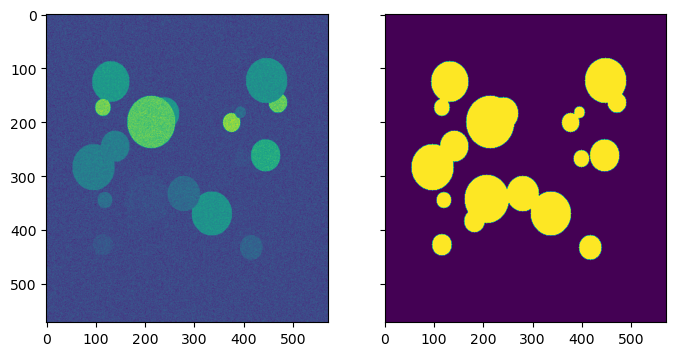

In [7]:
nx = 572
ny = 572
generator = GrayScaleDataProvider(nx, ny, cnt=20)
x_test, y_test = generator(1)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
ax[0].imshow(x_test[0, ..., 0], aspect="auto")
ax[1].imshow(y_test[0, ..., 1], aspect="auto")

plt.show()

In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms
from sklearn.metrics import jaccard_score
import random
import cv2

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∫—Ä—É–∂–æ—á–∫–æ–≤:</h4>
</div>

–ù–∞–ø–∏—à–µ–º –∫–ª–∞—Å—Å –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ torch.utils.data.Dataset –∫—Ä—É–∂–æ—á–∫–æ–≤:

In [9]:
class CircleSegmentationDataset(Dataset):
    """
    PyTorch Dataset for generating synthetic grayscale images with circular segmentation masks.

    This dataset wraps around a data provider GrayScaleDataProvider, that generates
    synthetic data on-the-fly. Each sample returned is a tensor pair (image, mask), suitable
    for training segmentation models.

    Attributes:
        provider (BaseDataProvider): A data provider instance that generates images and masks.
        count (int): Total number of samples in the dataset.

    Args:
        provider (BaseDataProvider): Instance of a data provider GrayScaleDataProvider.
        count (int): Number of samples to be generated in the dataset.
    """
    def __init__(self, provider, count):
        self.provider = provider
        self.count = count

    def __len__(self):
        """
        Returns the total number of samples in the dataset.
    
        Returns:
            int: The number of samples.
        """
        return self.count

    def __getitem__(self, idx):
        """
        Generates and returns a single sample from the dataset.
    
        Args:
            idx (int): Index of the sample (not used since data is generated on-the-fly).
    
        Returns:
            tuple:
                - image (torch.Tensor): Normalized grayscale image tensor of shape (1, H, W).
                - mask (torch.Tensor): Binary mask tensor of shape (H, W), corresponding to the object class.
        """
        x, y = self.provider(1)
        x = x[0].transpose(2, 0, 1)  # to (C, H, W)
        y = y[0].transpose(2, 0, 1)  # to (n_class, H, W)
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y[1], dtype=torch.float32)

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> U-Net:</h4>
</div>

<b>UNet</b> ‚Äî —ç—Ç–æ —Å–≤–µ—Ä—Ç–æ—á–Ω–∞—è –Ω–µ–π—Ä–æ—Å–µ—Ç—å, —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω–∞—è –¥–ª—è –∑–∞–¥–∞—á —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏, –≥–¥–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∫–ª–∞—Å—Å –∫–∞–∂–¥–æ–≥–æ –ø–∏–∫—Å–µ–ª—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.
<br><b>–û—Å–Ω–æ–≤–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã:</b>
<br> 1.	Encoder (—Å–∂–∏–º–∞—é—â–∞—è —á–∞—Å—Ç—å):
 - –ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –±–ª–æ–∫–æ–≤: Conv ‚Üí ReLU ‚Üí Conv ‚Üí ReLU ‚Üí MaxPool
 - –ò–∑–≤–ª–µ–∫–∞–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —É–º–µ–Ω—å—à–∞–µ—Ç –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ (H√óW).
2.	Bottleneck (—Å–µ—Ä–µ–¥–∏–Ω–∞ —Å–µ—Ç–∏):
 - –°–∞–º—ã–π —É–∑–∫–∏–π —É—Ä–æ–≤–µ–Ω—å, –≥–¥–µ –∏–∑–≤–ª–µ–∫–∞—é—Ç—Å—è –≤—ã—Å–æ–∫–æ—É—Ä–æ–≤–Ω–µ–≤—ã–µ –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.
3.	Decoder (–≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—é—â–∞—è —á–∞—Å—Ç—å):
 - –ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –±–ª–æ–∫–æ–≤: Upsample (ConvTranspose2d) ‚Üí Concatenate (skip connection) ‚Üí Conv ‚Üí ReLU ‚Üí Conv ‚Üí ReLU
 - –£–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç —Ä–∞–∑–º–µ—Ä –∫–∞—Ä—Ç—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.
4.	Skip connections (–ø—Ä—è–º—ã–µ —Å–≤—è–∑–∏):
 - –°–æ–µ–¥–∏–Ω—è—é—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —É—Ä–æ–≤–Ω–∏ —ç–Ω–∫–æ–¥–µ—Ä–∞ –∏ –¥–µ–∫–æ–¥–µ—Ä–∞.
 - –ü–æ–º–æ–≥–∞—é—Ç —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –º–µ–ª–∫–∏–µ –¥–µ—Ç–∞–ª–∏, —Ç–µ—Ä—è—é—â–∏–µ—Å—è –ø—Ä–∏ –ø–æ–Ω–∏–∂–µ–Ω–∏–∏ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è.
5.	Output Layer:
 - 1√ó1 Convolution + Sigmoid –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
 - –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∫–∞—Ä—Ç—É –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π: –∫–∞–∂–¥—ã–π –ø–∏–∫—Å–µ–ª—å ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫ –∫–ª–∞—Å—Å—É.

–ù–∞–ø–∏—à–µ–º –∫–ª–∞—Å—Å —Å –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–æ–π U-Net –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏:

In [10]:
class UNet(nn.Module):
    """
    A simplified UNet architecture for binary image segmentation.

    The network follows an encoder‚Äìbottleneck‚Äìdecoder structure with skip connections.
    It uses two levels of downsampling and upsampling, and outputs a single-channel
    prediction map with values in [0, 1], representing the probability of the foreground class.

    Architecture:
        - Encoder: 2 downsampling blocks (Conv + ReLU + MaxPool)
        - Bottleneck: double conv block
        - Decoder: 2 upsampling blocks with skip connections
        - Output: 1x1 convolution followed by sigmoid activation for binary segmentation

    Input shape:
        (B, 1, H, W) ‚Äî grayscale image batch

    Output shape:
        (B, 1, H, W) ‚Äî segmentation probability map
    """
    def __init__(self):
        super(UNet, self).__init__()
        def CBR(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_ch, out_ch, 3, padding=1),
                nn.ReLU(inplace=True),
            )
        self.enc1 = CBR(1, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = CBR(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.bottleneck = CBR(128, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = CBR(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = CBR(128, 64)
        self.final = nn.Conv2d(64, 1, 1)

    def forward(self, x):
        """
        Forward pass of the UNet model.
    
        Args:
            x (torch.Tensor): Input tensor of shape (B, 1, H, W), where B is batch size.
    
        Returns:
            torch.Tensor: Output tensor of shape (B, 1, H, W) with sigmoid activation,
                          representing per-pixel probabilities for the foreground class.
        """
        # –ü—Ä–æ—Ö–æ–¥ —á–µ—Ä–µ–∑ –ø–µ—Ä–≤—ã–π —ç–Ω–∫–æ–¥–µ—Ä–Ω—ã–π –±–ª–æ–∫ (–¥–≤–µ —Å–≤–µ—Ä—Ç–∫–∏ —Å ReLU –∞–∫—Ç–∏–≤–∞—Ü–∏–µ–π).
        # –í—Ö–æ–¥ x –∏–º–µ–µ—Ç —Ñ–æ—Ä–º—É (B, 1, H, W) ‚Äî –æ–¥–∏–Ω –∫–∞–Ω–∞–ª –¥–ª—è –±–∏–Ω–∞—Ä–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏.
        # –í—ã—Ö–æ–¥ e1 –±—É–¥–µ—Ç –∏–º–µ—Ç—å —Ñ–æ—Ä–º—É (B, 64, H, W), —Ç–æ –µ—Å—Ç—å 64 –∫–∞–Ω–∞–ª–∞ –ø–æ—Å–ª–µ —Å–≤–µ—Ä—Ç–æ–∫.
        e1 = self.enc1(x)
        # –ü—Ä–∏–º–µ–Ω—è–µ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ (MaxPool2d) —Å —Ä–∞–∑–º–µ—Ä–æ–º –æ–∫–Ω–∞ 2x2 –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è (H, W).
        # –î–∞–ª–µ–µ –ø—Ä–æ—Ö–æ–¥–∏–º —á–µ—Ä–µ–∑ –≤—Ç–æ—Ä–æ–π —ç–Ω–∫–æ–¥–µ—Ä–Ω—ã–π –±–ª–æ–∫, –∫–æ—Ç–æ—Ä—ã–π —Ç–∞–∫–∂–µ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –¥–≤—É—Ö —Å–≤–µ—Ä—Ç–æ–∫ —Å ReLU –∞–∫—Ç–∏–≤–∞—Ü–∏–µ–π.
        # –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø–æ–ª—É—á–∞–µ–º e2 —Å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å—é (B, 128, H/2, W/2).
        e2 = self.enc2(self.pool1(e1))
        # –ü—Ä–∏–º–µ–Ω—è–µ–º –µ—â–µ –æ–¥–Ω–æ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–ª—è —Å–∂–∞—Ç–∏—è –¥–∞–Ω–Ω—ã—Ö –≤ bottleneck –±–ª–æ–∫.
        # –ë–ª–æ–∫ bottleneck —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –¥–≤—É—Ö —Å–≤–µ—Ä—Ç–æ–∫ —Å ReLU –∞–∫—Ç–∏–≤–∞—Ü–∏–µ–π –∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏–∑–≤–ª–µ—á—å –±–æ–ª–µ–µ –∞–±—Å—Ç—Ä–∞–∫—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.
        # –†–µ–∑—É–ª—å—Ç–∞—Ç b –±—É–¥–µ—Ç –∏–º–µ—Ç—å —Ñ–æ—Ä–º—É (B, 256, H/4, W/4), —Ç–∞–∫ –∫–∞–∫ pooling —É–º–µ–Ω—å—à–∞–µ—Ç —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ –Ω–∞ 2x.
        b = self.bottleneck(self.pool2(e2))
        # –ü—Ä–æ—Ö–æ–¥–∏–º —á–µ—Ä–µ–∑ –¥–µ–∫–æ–¥–µ—Ä–Ω—ã–π –±–ª–æ–∫ 2 (dec2), –∫–æ—Ç–æ—Ä—ã–π –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Ç—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Å–≤–µ—Ä—Ç–∫—É (up2).
        # –≠—Ç–æ –æ–ø–µ—Ä–∞—Ü–∏—è –∞–ø—Å–µ–º–ø–ª–∏–Ω–≥–∞, –∫–æ—Ç–æ—Ä–∞—è –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —É–≤–µ–ª–∏—á–∏–≤ –≤—ã—Å–æ—Ç—É –∏ —à–∏—Ä–∏–Ω—É.
        # –ó–∞—Ç–µ–º –≤—ã–ø–æ–ª–Ω—è–µ–º –∫–æ–Ω–∫–∞—Ç–µ–Ω–∞—Ü–∏—é —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –∞–ø—Å–µ–º–ø–ª–∏–Ω–≥–∞ (up2) —Å –≤—ã—Ö–æ–¥–æ–º –∏–∑ –≤—Ç–æ—Ä–æ–≥–æ —ç–Ω–∫–æ–¥–µ—Ä–∞ (e2) –≤–¥–æ–ª—å –∫–∞–Ω–∞–ª–∞ (dim=1).
        # –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º skip-—Å–æ–µ–¥–∏–Ω–µ–Ω–∏–µ, —á—Ç–æ–±—ã –ø–µ—Ä–µ–¥–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é —Å –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —Å–ª–æ–µ–≤ –≤ –¥–µ–∫–æ–¥–µ—Ä.
        # –†–µ–∑—É–ª—å—Ç–∞—Ç d2 –∏–º–µ–µ—Ç —Ñ–æ—Ä–º—É (B, 128, H/2, W/2).
        d2 = self.dec2(torch.cat([self.up2(b), e2], dim=1))
        # –ü—Ä–æ—Ü–µ—Å—Å –∞–Ω–∞–ª–æ–≥–∏—á–µ–Ω –ø—Ä–µ–¥—ã–¥—É—â–µ–º—É: –ø—Ä–∏–º–µ–Ω—è–µ–º —Ç—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Å–≤–µ—Ä—Ç–∫—É (up1) –¥–ª—è –∞–ø—Å–µ–º–ø–ª–∏–Ω–≥–∞.
        # –î–∞–ª–µ–µ –≤—ã–ø–æ–ª–Ω—è–µ–º –∫–æ–Ω–∫–∞—Ç–µ–Ω–∞—Ü–∏—é —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –∏–∑ –ø–µ—Ä–≤–æ–≥–æ —ç–Ω–∫–æ–¥–µ—Ä–∞ (e1), —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ –±–æ–ª–µ–µ —Ä–∞–Ω–Ω–∏—Ö —Å–ª–æ–µ–≤.
        # –†–µ–∑—É–ª—å—Ç–∞—Ç d1 –∏–º–µ–µ—Ç —Ñ–æ—Ä–º—É (B, 64, H, W), –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—è –Ω–∞—á–∞–ª—å–Ω–æ–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.
        d1 = self.dec1(torch.cat([self.up1(d2), e1], dim=1))
        # –§–∏–Ω–∞–ª—å–Ω—ã–π —Å–ª–æ–π ‚Äî —ç—Ç–æ —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–π —Å–ª–æ–π —Å —è–¥—Ä–æ–º 1x1, –∫–æ—Ç–æ—Ä—ã–π —Å–∂–∏–º–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–Ω–∞–ª–æ–≤
        # —Å 64 –¥–æ 1 (—Ç.–µ. –æ–¥–∏–Ω –∫–∞–Ω–∞–ª –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫ –∫–ª–∞—Å—Å—É –∫—Ä—É–∂–æ–∫).
        # –ü–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ ‚Äî —ç—Ç–æ –ª–æ–≥–∏—Ç (–Ω–µ–æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ), –ø–æ—ç—Ç–æ–º—É –º—ã –ø—Ä–∏–º–µ–Ω—è–µ–º
        # —Å–∏–≥–º–æ–∏–¥—É torch.sigmoid(), —á—Ç–æ–±—ã –ø—Ä–∏–≤–µ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –∫ –¥–∏–∞–ø–∞–∑–æ–Ω—É [0, 1].
        
        # –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–∞ –≤—ã—Ö–æ–¥–µ –ø–æ–ª—É—á–∞–µ–º –∫–∞—Ä—Ç—É –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π:
        # - –∫–∞–∂–¥—ã–π –ø–∏–∫—Å–µ–ª—å –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ç 0 –¥–æ 1,
        # - –≥–¥–µ 0 –æ–∑–Ω–∞—á–∞–µ—Ç —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –≤ "—Ñ–æ–Ω–µ", –∞ 1 ‚Äî —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –≤ "–æ–±—ä–µ–∫—Ç–µ".
        
        # –≠—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–∏ –±–∏–Ω–∞—Ä–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏, –≥–¥–µ –Ω—É–∂–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏
        # –∫–∞–∂–¥–æ–≥–æ –ø–∏–∫—Å–µ–ª—è –∫ –æ–¥–Ω–æ–º—É –∫–ª–∞—Å—Å—É ("–∫—Ä—É–∂–æ–∫" –∏–ª–∏ "–Ω–µ –∫—Ä—É–∂–æ–∫").
        return torch.sigmoid(self.final(d1))

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> Data Preparation</h4>
</div>

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏:

In [11]:
# –†–∞–∑–º–µ—Ä—ã —Å–æ–∑–¥–∞–≤–∞–µ–º–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è (—à–∏—Ä–∏–Ω–∞ –∏ –≤—ã—Å–æ—Ç–∞)
nx = 572
ny = 572

# –°–æ–∑–¥–∞–µ–º –ø—Ä–æ–≤–∞–π–¥–µ—Ä –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–π –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å 20 —Å–ª—É—á–∞–π–Ω—ã–º–∏ –∫—Ä—É–≥–∞–º–∏
provider = GrayScaleDataProvider(nx, ny, cnt=20)
# –°–æ–∑–¥–∞–µ–º PyTorch Dataset, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è—Ç—å 100 —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –º–∞—Å–æ–∫
dataset = CircleSegmentationDataset(provider, count=100)

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> –†–∞–∑–±–∏–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞</h4>
</div>

In [12]:
# –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ ‚Äî 60% 
train_size = int(0.6 * len(dataset))
# –†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ ‚Äî 20% 
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

–°–¥–µ–ª–∞–µ–º —Ç—Ä–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏: –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è

In [13]:
batch_size = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> Model Training</h4>
</div>

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –º–æ–¥–µ–ª–∏ –∫ –æ–±—É—á–µ–Ω–∏—é:

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet().to(device)
# –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å ‚Äî –±–∏–Ω–∞—Ä–Ω–∞—è –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è.
criterion = nn.BCELoss()
# –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä ‚Äî Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

<br>–ú–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ epochs —Å –æ—Ç—Å–ª–µ–∂–∏–≤–∞–Ω–∏–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞:
 - –û–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ (Train Loss)
 - –í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ (Val Loss)
   
<br>–ö–∞–∂–¥–∞—è —ç–ø–æ—Ö–∞ –≤–∫–ª—é—á–∞–µ—Ç:
 - –ü—Ä—è–º–æ–π –∏ –æ–±—Ä–∞—Ç–Ω—ã–π –ø—Ä–æ—Ö–æ–¥ –ø–æ –±–∞—Ç—á–∞–º
 - –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤ —Å –ø–æ–º–æ—â—å—é –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ Adam
 - –ü–æ–¥—Å—á–µ—Ç —Å—Ä–µ–¥–Ω–µ–π –æ—à–∏–±–∫–∏ –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏ –∏ —Ç–µ—Å—Ç–µ

In [15]:
# –°–ø–∏—Å–∫–∏ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å
train_losses, val_losses = [], []
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö 
epochs = 10

for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        # –û–±–Ω—É–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –ø–µ—Ä–µ–¥ –æ–±—Ä–∞—Ç–Ω—ã–º –ø—Ä–æ—Ö–æ–¥–æ–º
        optimizer.zero_grad()
        # –ü—Ä—è–º–æ–π –ø—Ä–æ—Ö–æ–¥ ‚Äî –ø–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ—Ç –º–æ–¥–µ–ª–∏
        out = model(x)
        # –í—ã—á–∏—Å–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å
        loss = criterion(out, y.unsqueeze(1))
        # –û–±—Ä–∞—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ (backpropagation)
        loss.backward()
        # –û–±–Ω–æ–≤–ª—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ (Adam)
        optimizer.step()
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ—Ç–µ—Ä—å –¥–ª—è —ç—Ç–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏
        total_train_loss += loss.item()
    # –°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –∑–∞ –≤—Å—é –æ–±—É—á–∞—é—â—É—é —ç–ø–æ—Ö—É
    train_losses.append(total_train_loss / len(train_loader))

    model.eval()
    #Valid loss
    total_test_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ—Ç –º–æ–¥–µ–ª–∏
            out = model(x)
            # –í—ã—á–∏—Å–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å
            loss = criterion(out, y.unsqueeze(1))
            total_test_loss += loss.item()
    # –°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ –∑–∞ —Ç–µ–∫—É—â—É—é —ç–ø–æ—Ö—É
    val_losses.append(total_test_loss / len(val_loader))
    
    print(f"Epoch {epoch+1}/{epochs} - "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}")

Epoch 1/10 - Train Loss: 0.5017, Val Loss: 0.2685
Epoch 2/10 - Train Loss: 0.2080, Val Loss: 0.1426
Epoch 3/10 - Train Loss: 0.0895, Val Loss: 0.1605
Epoch 4/10 - Train Loss: 0.1312, Val Loss: 0.1222
Epoch 5/10 - Train Loss: 0.0796, Val Loss: 0.0718
Epoch 6/10 - Train Loss: 0.0759, Val Loss: 0.0498
Epoch 7/10 - Train Loss: 0.0623, Val Loss: 0.1672
Epoch 8/10 - Train Loss: 0.0650, Val Loss: 0.0501
Epoch 9/10 - Train Loss: 0.0902, Val Loss: 0.0584
Epoch 10/10 - Train Loss: 0.0820, Val Loss: 0.0788


<b>–í—ã–≤–æ–¥—ã:</b>
<br>–ú–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è —É–≤–µ—Ä–µ–Ω–Ω–æ ‚Äî –±—ã—Å—Ç—Ä–∞—è —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –∏ —É—Å—Ç–æ–π—á–∏–≤–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ. –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–µ—Ç ‚Äî –Ω–µ—Ç —Ä–µ–∑–∫–æ–≥–æ —Ä–æ—Å—Ç–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π/—Ç–µ—Å—Ç–æ–≤–æ–π –æ—à–∏–±–∫–∏ –ø—Ä–∏ —Å–Ω–∏–∂–µ–Ω–∏–∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> Loss Plot</h4>
</div>

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')  
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss")
plt.legend()
plt.grid(True)
plt.show()

<b>–í—ã–≤–æ–¥—ã:</b>
<br>–ü–æ—Ç–µ—Ä–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–æ –ø–∞–¥–∞—é—Ç –Ω–∞ –ø–µ—Ä–≤—ã—Ö —ç–ø–æ—Ö–∞—Ö ‚Äî —ç—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫ —Ç–æ–≥–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –±—ã—Å—Ç—Ä–æ –æ–±—É—á–∞–µ—Ç—Å—è. Test Loss –Ω–µ –Ω–∞—á–∏–Ω–∞–µ—Ç —Ä–∞—Å—Ç–∏ –ø–æ—Å–ª–µ —Å–Ω–∏–∂–µ–Ω–∏—è ‚Äî –º–æ–¥–µ–ª—å –Ω–µ –ø–µ—Ä–µ–æ–±—É—á–∏–ª–∞—Å—å.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;">
IoU Evaluation on Validation</h4>
</div>

–û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏: IoU
<br>IoU –∏–∑–º–µ—Ä—è–µ—Ç —Å—Ç–µ–ø–µ–Ω—å —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π –∏ –∏—Å—Ç–∏–Ω–Ω–æ–π –º–∞—Å–æ–∫:
 - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å—á–∏—Ç–∞–µ—Ç—Å—è –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã–π IoU, –∑–∞—Ç–µ–º –±–µ—Ä—ë—Ç—Å—è —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ.
 - $\text{IoU} = \frac{\text{Intersection}}{\text{Union}}$

In [17]:
# –°–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π IoU (Intersection over Union) –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
ious = []
# –û—Ç–∫–ª—é—á–∞–µ–º –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ 
with torch.no_grad():
    for x, y in val_loader:
        x, y = x.to(device), y.to(device)
        # –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –æ—Ç –º–æ–¥–µ–ª–∏ 
        out = model(x)
        # –ü—Ä–µ–≤—Ä–∞—â–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –≤ –±–∏–Ω–∞—Ä–Ω—ã–µ –º–∞—Å–∫–∏
        pred = (out > 0.5).float()
        for p, t in zip(pred, y.unsqueeze(1)):
            # –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º –æ—Ç–¥–µ–ª—å–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ –±–∞—Ç—á–µ
            # –í—ã—á–∏—Å–ª—è–µ–º IoU
            iou = jaccard_score(t.cpu().numpy().flatten(), p.cpu().numpy().flatten())
            ious.append(iou)
# –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ IoU
print(f"Mean IoU on validation set: {np.mean(ious):.4f}")

Mean IoU on validation set: 0.8867


<b>–í—ã–≤–æ–¥—ã:</b>
<br>IoU > 0.8 –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ –Ω–∞—É—á–∏–ª–∞—Å—å –æ—Ç–¥–µ–ª—è—Ç—å –∫—Ä—É–∂–æ—á–∫–∏ –æ—Ç —Ñ–æ–Ω–∞.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;">–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ val_loader:</h4>
</div>

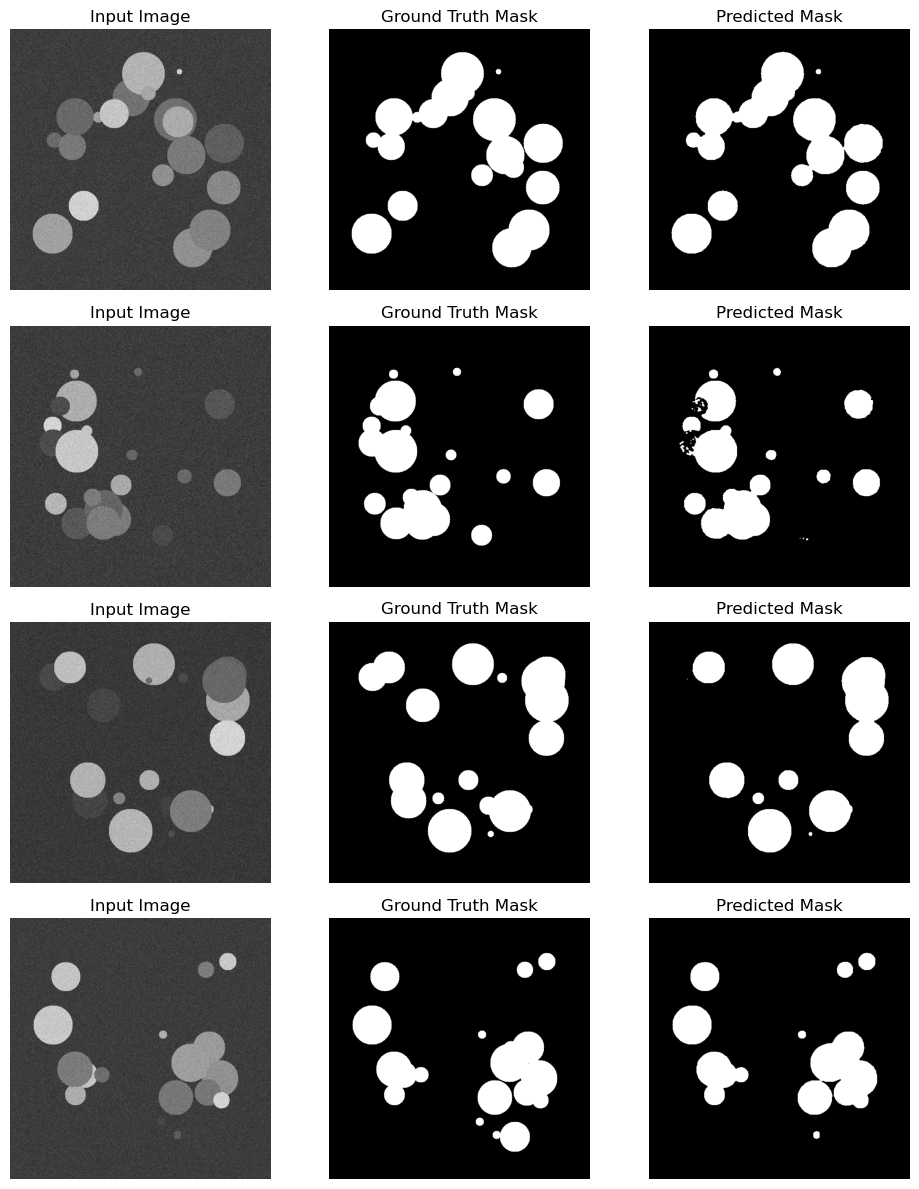

In [18]:
example_batch = next(iter(val_loader))
images, true_masks = example_batch
images, true_masks = images.to(device), true_masks.to(device)

with torch.no_grad():
    predicted_masks = model(images)
    predicted_masks = (predicted_masks > 0.5).float()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø—Ä–∏–º–µ—Ä–æ–≤
num_samples = min(4, images.shape[0])
fig, axs = plt.subplots(num_samples, 3, figsize=(10, 3 * num_samples))

for i in range(num_samples):
    axs[i, 0].imshow(images[i][0].cpu(), cmap='gray')
    axs[i, 0].set_title("Input Image")
    axs[i, 1].imshow(true_masks[i].cpu(), cmap='gray')
    axs[i, 1].set_title("Ground Truth Mask")
    axs[i, 2].imshow(predicted_masks[i][0].cpu(), cmap='gray')
    axs[i, 2].set_title("Predicted Mask")
    for j in range(3):
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

<b>–í—ã–≤–æ–¥—ã:</b>
<br>–ú–æ–¥–µ–ª—å UNet —É—Å–ø–µ—à–Ω–æ –æ–±—É—á–∏–ª–∞—Å—å –Ω–∞ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö ‚Äî –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–∞ —Ö–æ—Ä–æ—à–∞—è —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –±–µ–∑ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;">–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ test_loader:</h4>
</div>

In [19]:
from sklearn.metrics import jaccard_score, f1_score, accuracy_score, precision_score, recall_score

In [20]:
ious = []
dices = []
accuracies = []
precisions = []
recalls = []
f1s = []

model.eval()
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        out = model(x)
        pred = (out > 0.5).float()

        for p, t in zip(pred, y.unsqueeze(1)):
            y_true = t.cpu().numpy().flatten()
            y_pred = p.cpu().numpy().flatten()
        
            ious.append(jaccard_score(y_true, y_pred))
            dices.append(2 * np.logical_and(y_true, y_pred).sum() / (y_true.sum() + y_pred.sum() + 1e-8))
            accuracies.append(accuracy_score(y_true, y_pred))
            precisions.append(precision_score(y_true, y_pred))
            recalls.append(recall_score(y_true, y_pred))
            f1s.append(f1_score(y_true, y_pred))

# üìä –í—ã–≤–æ–¥ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –≤—Å–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º
print("Test metrics:")
print(f"Mean IoU:       {np.mean(ious):.4f}")
print(f"Mean Dice:      {np.mean(dices):.4f}")
print(f"Accuracy:       {np.mean(accuracies):.4f}")
print(f"Precision:      {np.mean(precisions):.4f}")
print(f"Recall:         {np.mean(recalls):.4f}")
print(f"F1 Score:       {np.mean(f1s):.4f}")

Test metrics:
Mean IoU:       0.8647
Mean Dice:      0.9253
Accuracy:       0.9781
Precision:      0.9953
Recall:         0.8684
F1 Score:       0.9253


<b>–í—ã–≤–æ–¥—ã</b>:
 - –í—ã—Å–æ–∫–∏–π IoU –∏ Dice –≥–æ–≤–æ—Ä—è—Ç –æ —Ç–æ—á–Ω–æ–º —Å–æ–≤–ø–∞–¥–µ–Ω–∏–∏ —Ñ–æ—Ä–º –∏ –≥—Ä–∞–Ω–∏—Ü –æ–±—ä–µ–∫—Ç–æ–≤.
 - Accuracy 98%, –Ω–æ –ª—É—á—à–µ —Ç—Ä–∞–∫—Ç–æ–≤–∞—Ç—å –æ—Å—Ç–æ—Ä–æ–∂–Ω–æ, —Ç–∞–∫ –∫–∞–∫ —Ñ–æ–Ω –∑–∞–Ω–∏–º–∞–µ—Ç –±–æ–ª—å—à—É—é —á–∞—Å—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.
 - Recall –∏ Precision - –º–æ–¥–µ–ª—å –Ω–∞—Ö–æ–¥–∏—Ç –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫—Ä—É–∂–æ—á–∫–æ–≤ –∏ –ø–æ—á—Ç–∏ –Ω–µ –æ—à–∏–±–∞–µ—Ç—Å—è.
 - F1 Score  - –º–æ–¥–µ–ª—å —Å–µ–≥–º–µ–Ω—Ç–∏—Ä—É–µ—Ç —É–≤–µ—Ä–µ–Ω–Ω–æ.
<br>–ú–æ–¥–µ–ª—å UNet –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ –æ–±—É—á–∏–ª–∞—Å—å –∏ —Ö–æ—Ä–æ—à–æ –ø–æ–∫–∞–∑–∞–ª–∞ —Å–µ–±—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;">–ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–∑ test_loader:</h4>
</div>

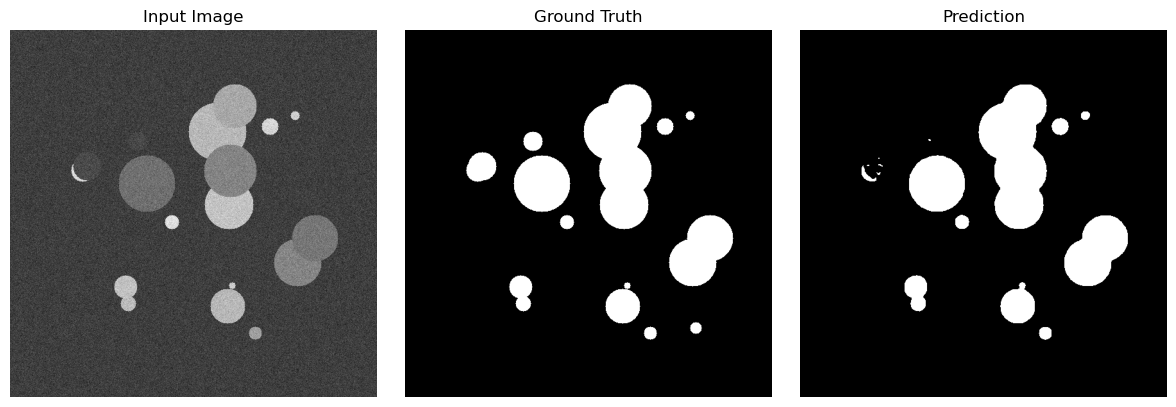

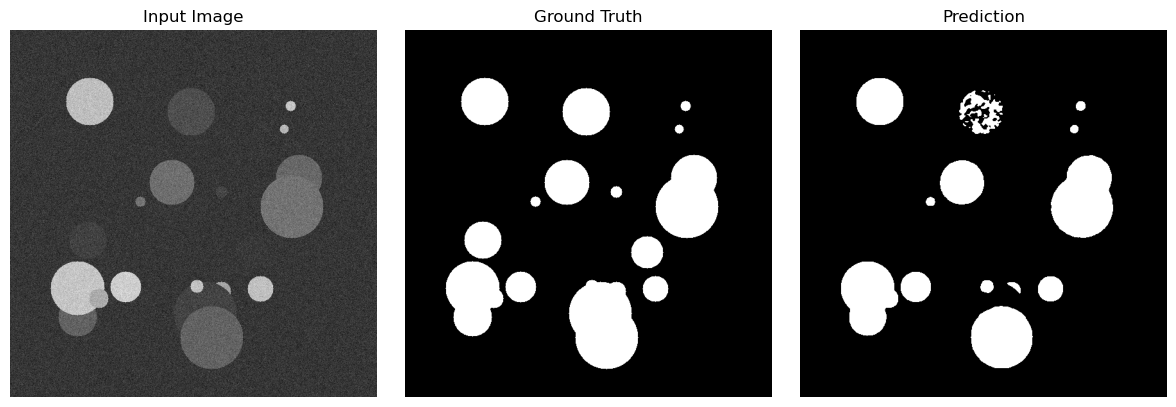

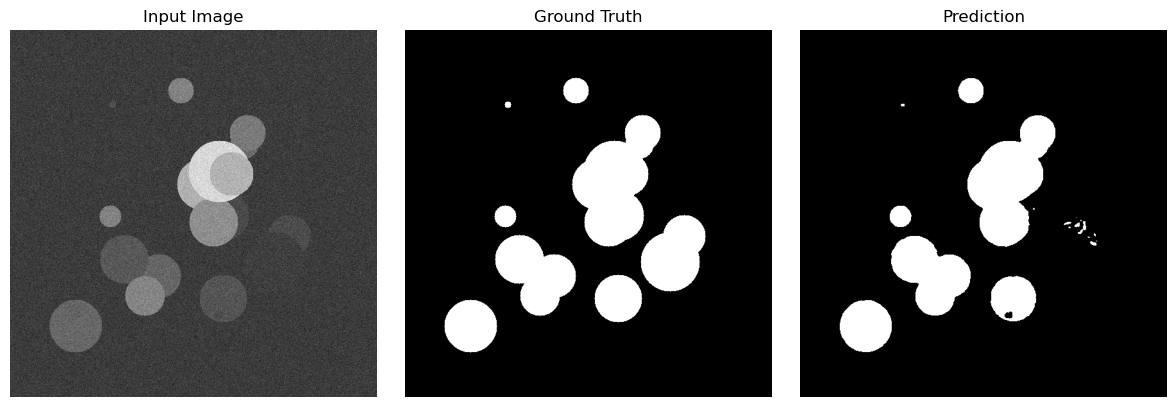

In [21]:
n = 5  
examples = 0

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        out = model(x)
        pred = (out > 0.5).float()

        for i in range(x.size(0)):
            img = x[i, 0].cpu().numpy()                    # (H, W), –∫–∞–Ω–∞–ª –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
            true_mask = y[i].cpu().numpy()                # (H, W), ground truth –º–∞—Å–∫–∞
            pred_mask = pred[i, 0].cpu().numpy()          # (H, W), predicted –º–∞—Å–∫–∞

            # –û—Ç–æ–±—Ä–∞–∂–∞–µ–º
            plt.figure(figsize=(12, 4))
            
            plt.subplot(1, 3, 1)
            plt.imshow(img, cmap='gray')
            plt.title("Input Image")
            plt.axis("off")

            plt.subplot(1, 3, 2)
            plt.imshow(true_mask, cmap='gray')
            plt.title("Ground Truth")
            plt.axis("off")

            plt.subplot(1, 3, 3)
            plt.imshow(pred_mask, cmap='gray')
            plt.title("Prediction")
            plt.axis("off")

            plt.tight_layout()
            plt.show()

            examples += 1
            if examples >= n:
                break
        if examples >= n:
            break